# Задание 1 (1 балл)

Если разбить поисковые запросы пользователей в РФ по тематикам, то можно выделить несколько кластеров, запросы в которых имеют похожий смысл или тему. В файле `searches.csv` - 6 временных рядов, соответствующих кластерам:

    1. Коронавирус
    2. Отели за границей
    3. Школьные задания
    4. Подарки и поздравления
    5. Спортивные события
    6. Музыка

Определите, какой временной ряд относится к какому кластеру.

Дайте ответ для всех кластеров в формате "кластерX - `<название>`, потому что ... (ваши наблюдения и выводы на основе временного ряда)".

Ответы без обоснования не будут приняты.


In [ ]:
import pandas as pd
from prophet import Prophet

searches_df = pd.read_csv('searches.csv', parse_dates=['ds'])
searches_df.head()

,ds,кластер1,кластер2,кластер3,кластер4,кластер5,кластер6
0,2019-01-01,299036,1493286,11268577,50492,18596,599268
1,2019-01-02,228190,818971,8629779,57169,25282,952299
2,2019-01-03,297875,734393,7828308,61336,25863,1176552
3,2019-01-04,211296,742071,7542338,64927,27730,1304149
4,2019-01-05,270611,828797,7618576,62939,27709,1419539


[Text(0.5, 1.0, 'График временных рядов кластера 1 (предположительно "Спортивные события")'),
 Text(0.5, 0, 'Месяцы'),
 Text(0, 0.5, 'Количество запросов')]

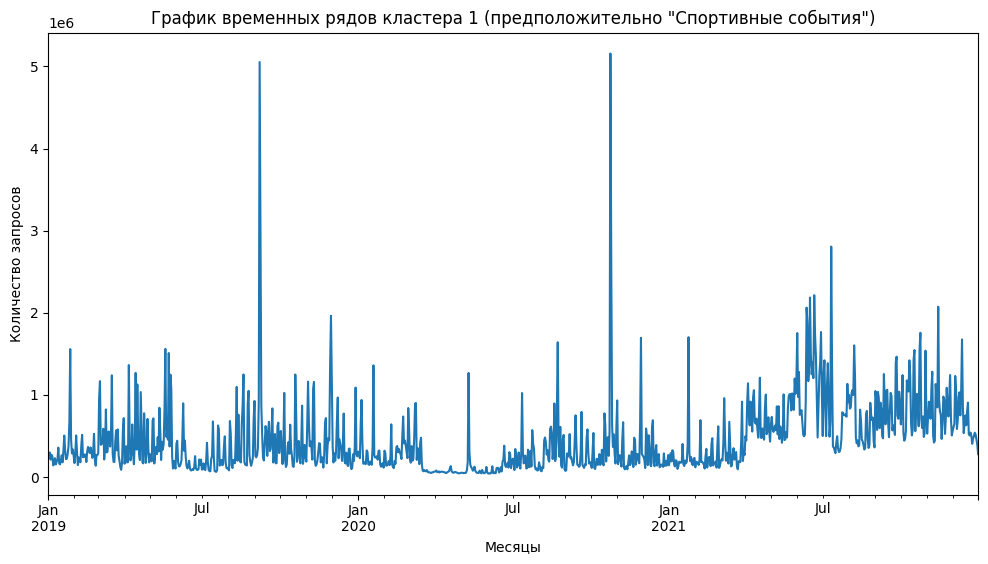

In [ ]:
claster1 = searches_df.loc[:, ['кластер1', 'ds']]
# превратим дату в индекс и сделаем изменение постоянным
claster1.set_index('ds', inplace = True)
# превратим дату (наш индекс) в объект datetime
claster1.index = pd.to_datetime(claster1.index)
plt1 = claster1.plot(figsize = (12,6), legend=None)
plt1.set(title = 'График временных рядов кластера 1 (предположительно "Спортивные события")', xlabel = 'Месяцы', ylabel = 'Количество запросов')


Полагаю, что этот кластер описывает "Спортивные события", но совсем не уверена в своём ответе. Просто это единственный вариант, который оставался для тем спорта и спортивных событий, в которых я, если честно, не то чтобы разбираюсь. Мне показался логичным спад интереса к этой теме в марте-апреле 2020 года, в разгар пандемии коронавируса. А резкие всплески в сентябре 2019 и в октябре 2021 года связаны, думаю, с какими-то очень важными спортивными событиями, в которых я не шарю...

[Text(0.5, 1.0, 'График временных рядов кластера 2 (предположительно "Подарки и поздравления")'),
 Text(0.5, 0, 'Месяцы'),
 Text(0, 0.5, 'Количество запросов')]

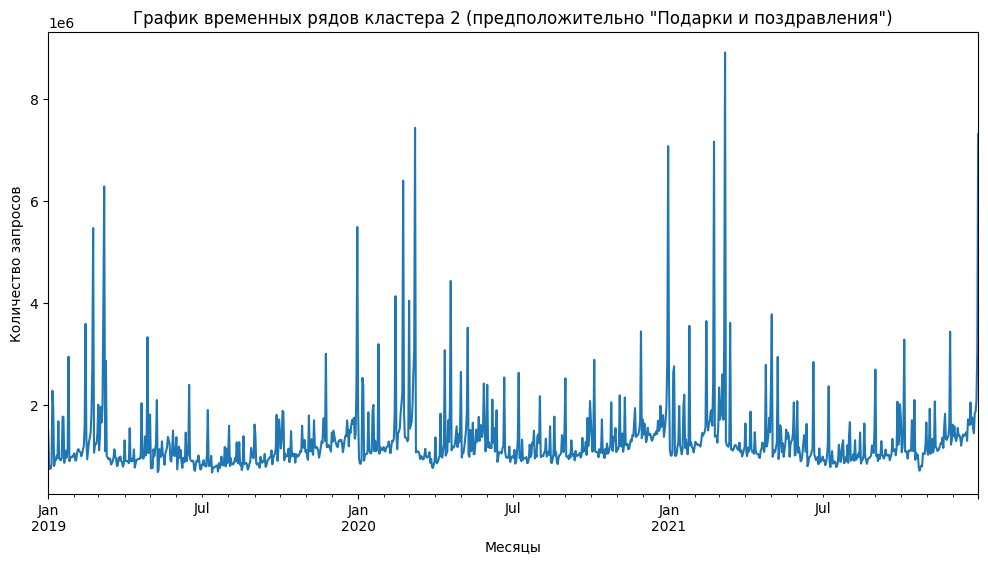

In [ ]:
claster2 = searches_df.loc[:, ['кластер2', 'ds']]
claster2.set_index('ds', inplace = True)
claster2.index = pd.to_datetime(claster2.index)
plt2 = claster2.plot(figsize = (12,6), legend = None)
plt2.set(title = 'График временных рядов кластера 2 (предположительно "Подарки и поздравления")', xlabel = 'Месяцы', ylabel = 'Количество запросов')


К этому графику наиболее подходящей кажется тема запросов "Подарки и поздравления". Здесь прослеживается очень чётко выраженная сезонность графика, всплески популярности к теме совпадают с наиболее распространёнными праздниками: февраль-начало марта (14 февраля день Святого Валентина, 23 февраля, 8 марта), начало июня (12 июня день России), конец декабря (31 декабря Новый год). В общем, данный вариант ответа здесь выглядит правдоподобно.

[Text(0.5, 1.0, 'График временных рядов кластера 3 (предположительно "Музыка")'),
 Text(0.5, 0, 'Месяцы'),
 Text(0, 0.5, 'Количество запросов')]

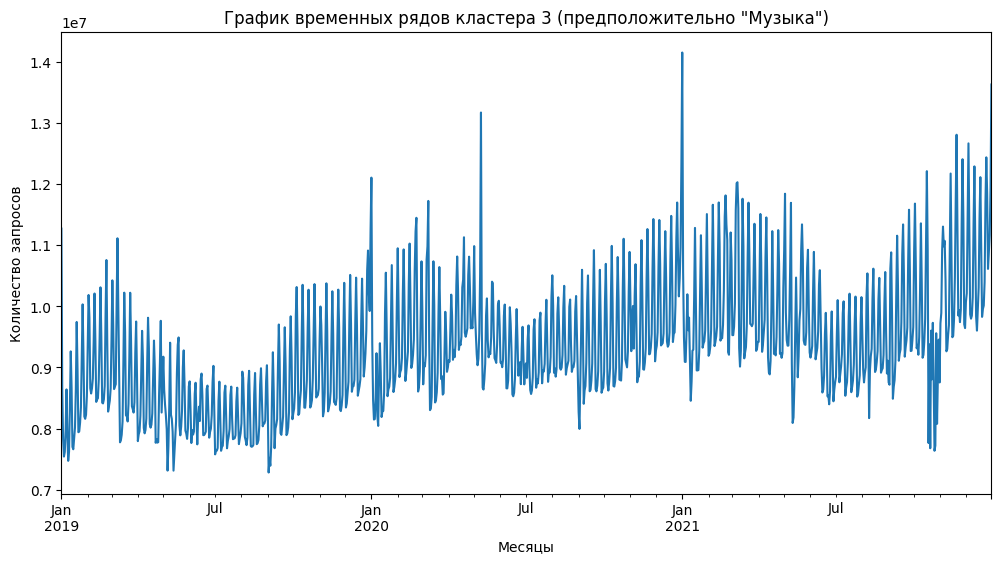

In [ ]:
claster3 = searches_df.loc[:, ['кластер3', 'ds']]
# превратим дату в индекс и сделаем изменение постоянным
claster3.set_index('ds', inplace = True)
# превратим дату (наш индекс) в объект datetime
claster3.index = pd.to_datetime(claster3.index)
plt3 = claster3.plot(figsize = (12,6), legend = None)
plt3.set(title = 'График временных рядов кластера 3 (предположительно "Музыка")', xlabel = 'Месяцы', ylabel = 'Количество запросов')


Этот кластер сложно анализировать ввиду отсутствия каких-то ярко выраженных аномалий, к которым можно было бы придумать логичное объяснение. Из данных в условии тем наиболее подходяще к такому описанию звучит тема "Музыка", поэтому я решила их сопоставить.

[Text(0.5, 1.0, 'График временных рядов кластера 4 (предположительно "Коронавирус")'),
 Text(0.5, 0, 'Месяцы'),
 Text(0, 0.5, 'Количество запросов')]

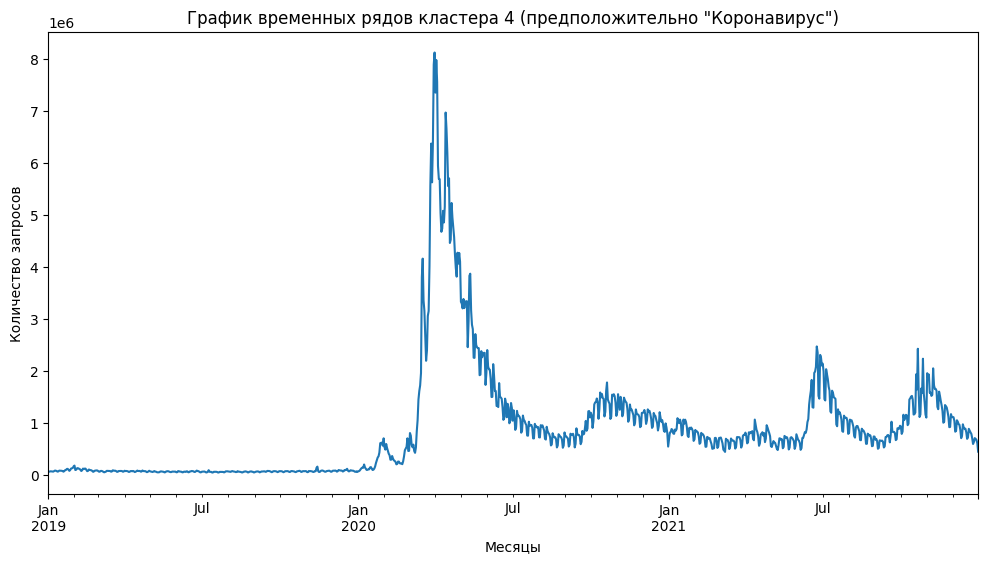

In [ ]:
claster4 = searches_df.loc[:, ['кластер4', 'ds']]
claster4.set_index('ds', inplace = True)
claster4.index = pd.to_datetime(claster4.index)
plt4 = claster4.plot(figsize = (12,6), legend = None)
plt4.set(title = 'График временных рядов кластера 4 (предположительно "Коронавирус")', xlabel = 'Месяцы', ylabel = 'Количество запросов')


Здесь ответ на ум приходит сразу. Никакой ярко выраженной сезонности у запроса не наблюдается, запрос вообще не был интересен пользователям до примерно января-февраля 2020 года. А затем произошёл резкий скачок в марте, когда запрос стал невероятно трендовым и популярным. И затем потихоньку интерес к нему угасал, иногда небольшими рывками возобновляясь и снова затухая.

Вспомним, что о коронавирусе впервые стало известно 1 декабря 2019 года, а в России все поголовно заговорили о нём именно в марте 2020 года, когда начали вводиться серьёзные ограничения, и картинка идеально сложится!

[Text(0.5, 1.0, 'График временных рядов кластера 5 (предположительно "Отели за границей")'),
 Text(0.5, 0, 'Месяцы'),
 Text(0, 0.5, 'Количество запросов')]

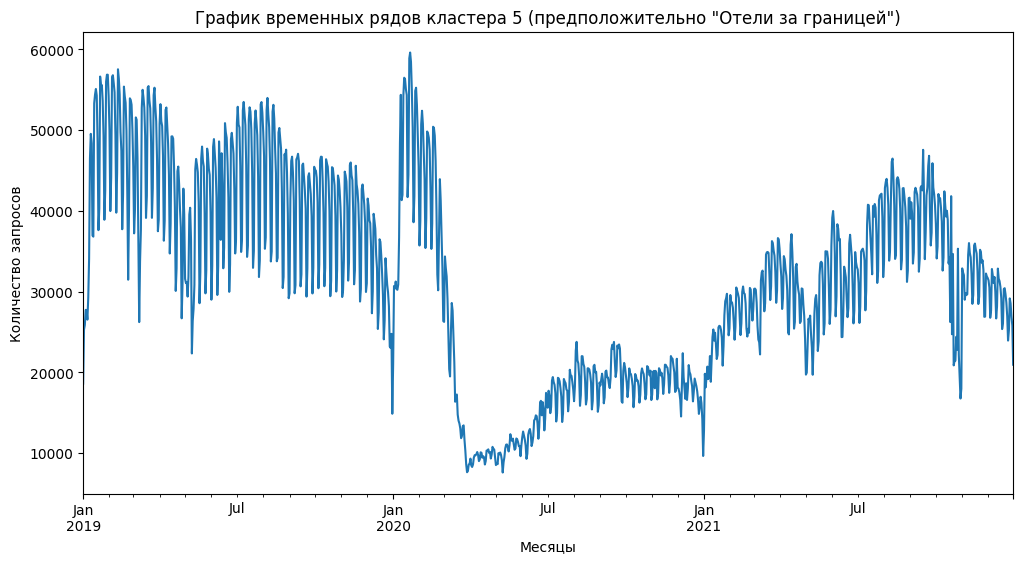

In [ ]:
claster5 = searches_df.loc[:, ['кластер5', 'ds']]
claster5.set_index('ds', inplace = True)
claster5.index = pd.to_datetime(claster5.index)
plt5 = claster5.plot(figsize = (12,6), legend = None)
plt5.set(title = 'График временных рядов кластера 5 (предположительно "Отели за границей")', xlabel = 'Месяцы', ylabel = 'Количество запросов')


Этот график отчасти коррелирует с предыдущим. Примечательно, что тема этого запроса была довольно популярна и актуальна в 2019 году, но в начале 2020 года резко начала терять свою значимость, а дно пришлось на период марта-апреля 2020 года (привет, коронавирус!). Оттуда уже медленно потихоньку запрос начал возвращать себе свою былую славу, но максимальных значений 2019 года ещё не достиг. В общем, выглядит похоже на тему "Отели за границей".

[Text(0.5, 1.0, 'График временных рядов кластера 6 (предположительно "Школьные задания")'),
 Text(0.5, 0, 'Месяцы'),
 Text(0, 0.5, 'Количество запросов')]

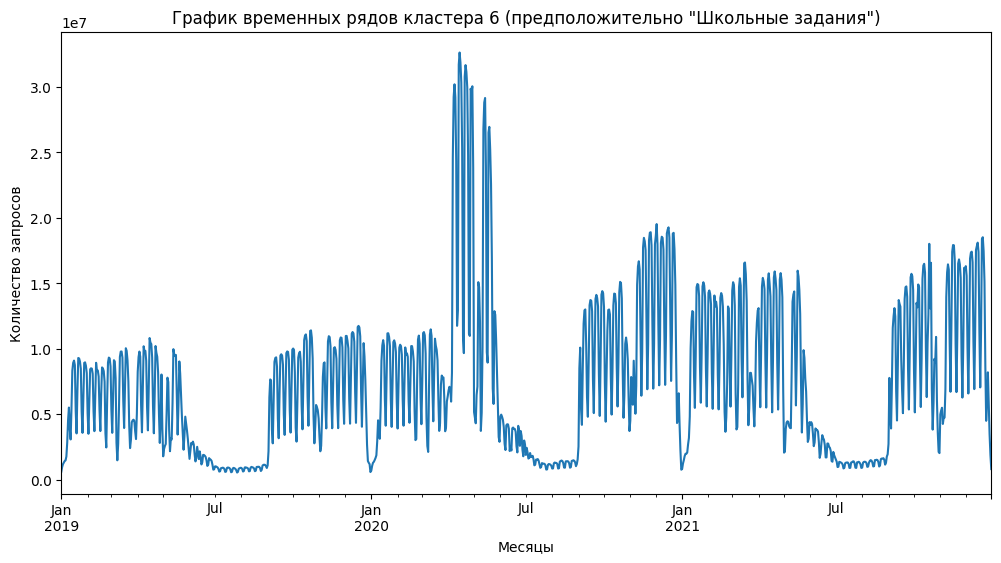

In [ ]:
claster6 = searches_df.loc[:, ['кластер6', 'ds']]
claster6.set_index('ds', inplace = True)
claster6.index = pd.to_datetime(claster6.index)
plt6 = claster6.plot(figsize = (12,6), legend = None)
plt6.set(title = 'График временных рядов кластера 6 (предположительно "Школьные задания")', xlabel = 'Месяцы', ylabel = 'Количество запросов')


На этом графике в глаза бросается стремящееся к нулю количество запросов в летние месяцы и в небольшой период, приближенный к началу января. Навевает воспоминаниями о школьных каникулах: зимних (конец декабря-начало января) и летних (июнь-май). В остальные периоды запрос достаточно регулярно был актуален. Интересно, что в апреле-марте 2020 года он вдруг стал сильно популярнее, нежели раньше, и в последующие месяцы тоже набирался чаще, нежели в те же месяцы прошлых лет. Полагаю, это связано с коронавирусными ограничениями и переходом большого количества обучений в дистанционный формат, в котором так тянет гуглить задания...

Несложно догадаться, что это график временных рядов темы "Школьные задания".

**Итого:** кластер 1 наверное обозначает "Спортивные события", кластер 2 = "Подарки и поздравления", кластер 3 может быть "Музыка", кластер 4 = "Коронавирус", кластер 5 скорее всего "Отели за границей", кластер 6 = "Школьные задания".


# Задание 2 (4 балла)


## Задача

Вам дана небольшая выборка поисковых запросов, связанных с поиском работы. Запросы разбиты на подкатегории 1, 2, 3, 4, 5, 6, 7 и 8.
Вам нужно сделать подневный прогноз **суммы** поисковых запросов с учётом трендов, сезонности, праздников и аномалий. При этом нужно продемонстрировать качество модели.

Представьте, что сегодня 1 июля 2021 года, и вам нужно спрогнозировать количество запросов до конца 2021 года.

Прогноз можно строить в Excel, Jupyter Notebook или другими знакомыми инструментами. Главное, чтобы расчёт мог воспроизвести другой человек.

## Данные



Для того, чтобы не только сделать прогноз, но и проверить качество модели, данные разбиты на три файла:

`train.csv` - обучающая выборка с 2017-01-01 по 2020-12-31

`test.csv` - тестовая выборка с 2021-01-01 по 2021-06-30

`val.csv` - валидационная выборка с 2021-07-01 по 2021-12-31. **Для чистоты эксперимента не смотрите его пока что, это данные о будущем, которое хотим предсказать.**

Их назначение будет объяснено позже.

## Оценка качества

Для оценки качества прогнозных моделей проведём эксперимент: скроем от модели часть известных нам данных, построим прогноз, а затем проверим, насколько хорошо он попадает в факт.

Для оценки качества моделей будем использовать метрику [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) по дням: $\text{MAPE} = 100\% \cdot \dfrac{1}{n}\sum_{i=1}^n  \left|\dfrac{факт_i - прогноз_i}{факт_i}\right| $

Например, если нужно рассчитать MAPE за первые 6 месяцев 2021 года (181 день), получим формулу $\text{MAPE} = 100\% \cdot \dfrac{1}{181}\sum_{i=1}^{181}  \left|\dfrac{факт_i - прогноз_i}{факт_i}\right| $


In [ ]:
# Пример функции MAPE, которая принимает на вход два списка с значениями
def mape(fact_list, forecast_list):
    errors = []

    for f, p in zip(fact_list, forecast_list):
        e = abs((f - p) / f)
        errors.append(e)

    return 100.0 * sum(errors) / len(errors)

mape([1, 2, 3, 4], [0.5, 1.5, 3, 4.5])

21.875

## 2.1. Базовый прогноз (1 балл)
1. Откройте обучающую выборку из файла `train.csv` в Excel или загрузите в pandas DataFrame. Модели должны обучаться только на ней
2. Постройте график временного ряда суммы поисковых запросов
3. Постройте прогноз этого ряда до конца 2021 года любым удобным вам способом (например, взяв код или формулу из лекции) **без** очистки данных, подбора параметров модели, учёта праздников и пр.
4. Прочитайте тестовые данные из файла `test.csv` и посчитайте ошибку прогноза (MAPE) на данных за первое полугодие 2021 года. Назовём это значение ошибки `mape1`

In [ ]:
import pandas as pd
from prophet import Prophet

train_df = pd.read_csv('train.csv', parse_dates=['ds'])
train_df.head()

,ds,1,2,3,4,5,6,7,8
0,2017-01-01,8061,10075,20735,8641,3414,39,2343,11229
1,2017-01-02,13243,15663,33827,18966,5900,61,4213,14216
2,2017-01-03,16230,18959,38730,24648,7560,65,5874,17375
3,2017-01-04,18671,21144,42381,29907,9394,69,8042,19965
4,2017-01-05,20471,23040,43880,32436,10076,72,8731,20599


[Text(0.5, 1.0, 'График временного ряда суммы поисковых запросов'),
 Text(0.5, 0, 'Годы'),
 Text(0, 0.5, 'Количество запросов')]

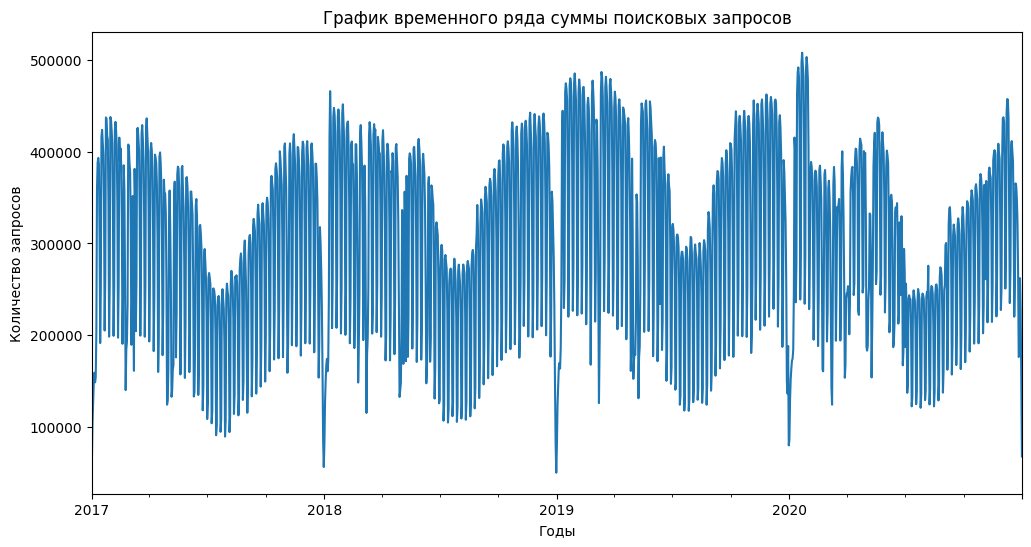

In [ ]:
# временной ряд суммы всех поисковых запросов (факт)
train_sum_df = pd.DataFrame({'ds':train_df.loc[:, 'ds'], 'y':train_df.loc[:, '1':'8'].sum(axis = 1)})
train_sum_df.set_index('ds', inplace = True)
train_sum_df.index = pd.to_datetime(train_sum_df.index)

# постройте график суммарного временного ряда
plt = train_sum_df.plot(figsize = (12,6), legend = None)
plt.set(title = 'График временного ряда суммы поисковых запросов', xlabel = 'Годы', ylabel = 'Количество запросов')


In [ ]:
from prophet import Prophet

train_sum_df['ds'] = train_sum_df.index

model = Prophet()
model.fit(train_sum_df)

# постройте прогноз этого суммарного ряда
forecast_df_1 = model.predict(train_sum_df)

forecast_df_1.head()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l6ud4lk/6jpehc3q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l6ud4lk/8755bll_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81087', 'data', 'file=/tmp/tmp_l6ud4lk/6jpehc3q.json', 'init=/tmp/tmp_l6ud4lk/8755bll_.json', 'output', 'file=/tmp/tmp_l6ud4lk/prophet_modelxskz767g/prophet_model-20230617173558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:35:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:35:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,277266.855600,37760.031829,150472.233885,277266.855600,277266.855600,-183163.321939,-183163.321939,-183163.321939,-90958.269543,-90958.269543,-90958.269543,-92205.052396,-92205.052396,-92205.052396,0.0,0.0,0.0,94103.533661
1,2017-01-02,277304.505613,185612.504664,297235.210681,277304.505613,277304.505613,-36719.287112,-36719.287112,-36719.287112,53564.629155,53564.629155,53564.629155,-90283.916267,-90283.916267,-90283.916267,0.0,0.0,0.0,240585.218502
2,2017-01-03,277342.155626,200651.485189,314959.316832,277342.155626,277342.155626,-21832.098790,-21832.098790,-21832.098790,65045.239291,65045.239291,65045.239291,-86877.338081,-86877.338081,-86877.338081,0.0,0.0,0.0,255510.056836
3,2017-01-04,277379.805639,199513.816244,307404.313543,277379.805639,277379.805639,-23830.707756,-23830.707756,-23830.707756,58192.391310,58192.391310,58192.391310,-82023.099066,-82023.099066,-82023.099066,0.0,0.0,0.0,253549.097883
4,2017-01-05,277417.455653,195144.214871,306648.283546,277417.455653,277417.455653,-27536.646790,-27536.646790,-27536.646790,48247.583040,48247.583040,48247.583040,-75784.229830,-75784.229830,-75784.229830,0.0,0.0,0.0,249880.808862


In [ ]:
test_df = pd.read_csv('test.csv', parse_dates=['ds'])
test_df.head()

,ds,1,2,3,4,5,6,7,8
0,2021-01-01,15721,26737,22323,6795,4608,54,5080,0
1,2021-01-02,22581,42605,33369,14446,7526,77,7141,0
2,2021-01-03,28147,42337,38091,18697,9639,89,8755,0
3,2021-01-04,30981,45813,39446,23713,11766,92,12895,0
4,2021-01-05,33250,45727,41607,25525,12616,96,13744,0


In [ ]:
# сумма всех поисков по дням из тестовой выборки
test_sum_df = pd.DataFrame({'ds':test_df.loc[:, 'ds'], 'y':test_df.loc[:, '1':'8'].sum(axis = 1)})

forecast_df_1 = model.predict(test_sum_df)

# посчитайте ошибку
mape1 = mape(test_sum_df['y'], forecast_df_1['yhat'])
mape1

13.782042914850779

## 2.2. Декомпозиция (1 балл)

Давайте проверим, получится ли модель точнее, если мы спрогнозируем сначала поиски по категориям, а затем суммируем.

5. Посмотрите категории поисковых запросов и определите, стоит ли все временные ряды прогнозировать независимо, или часть из них стоит сгруппировать в более крупные сущности (например, из 8 временных рядов можно получить 4). Почему?
6. Постройте прогнозы по исходным или сгруппированным временным рядам (так же **без** предобработки данных), посчитайте MAPE для суммы всех поисков. Назовём её `mape2`

Задание считается выполненным, если у вас есть прогноз, есть **минимум 2 группы** запросов и вы **объяснили**, почему объединили данные именно так (если объединяли) или почему не стали объединять.

**Решение:** попробуем сначала построить временные ряды и скользящие средние по месяцам для каждой категории запросов и проанализировать полученные результаты.

[Text(0.5, 1.0, 'График временного ряда запроса 1'),
 Text(0.5, 0, 'Годы'),
 Text(0, 0.5, 'Количество запросов')]

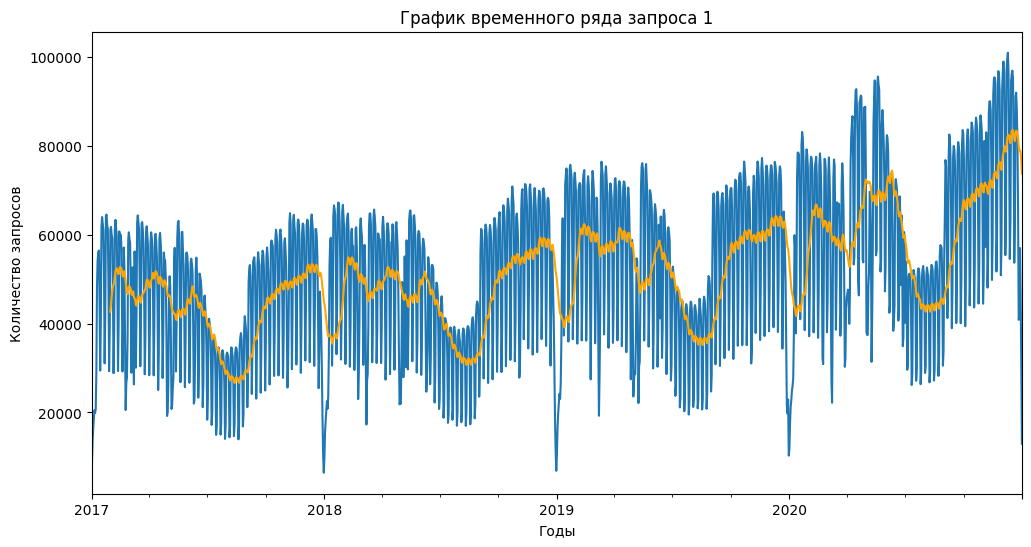

In [ ]:
train_sum_df1 = pd.DataFrame({'ds':train_df.loc[:, 'ds'], 'y':train_df.loc[:, '1']})
train_sum_df1.set_index('ds', inplace = True)
train_sum_df1.index = pd.to_datetime(train_sum_df1.index)

plt1 = train_sum_df1.plot(figsize = (12,6), legend = None)
plt1.plot(train_sum_df1.rolling(window = 30).mean(), label = 'Скользящее среднее по месяцам', color = 'orange')
plt1.set(title = 'График временного ряда запроса 1', xlabel = 'Годы', ylabel = 'Количество запросов')


[Text(0.5, 1.0, 'График временного ряда запроса 2'),
 Text(0.5, 0, 'Годы'),
 Text(0, 0.5, 'Количество запросов')]

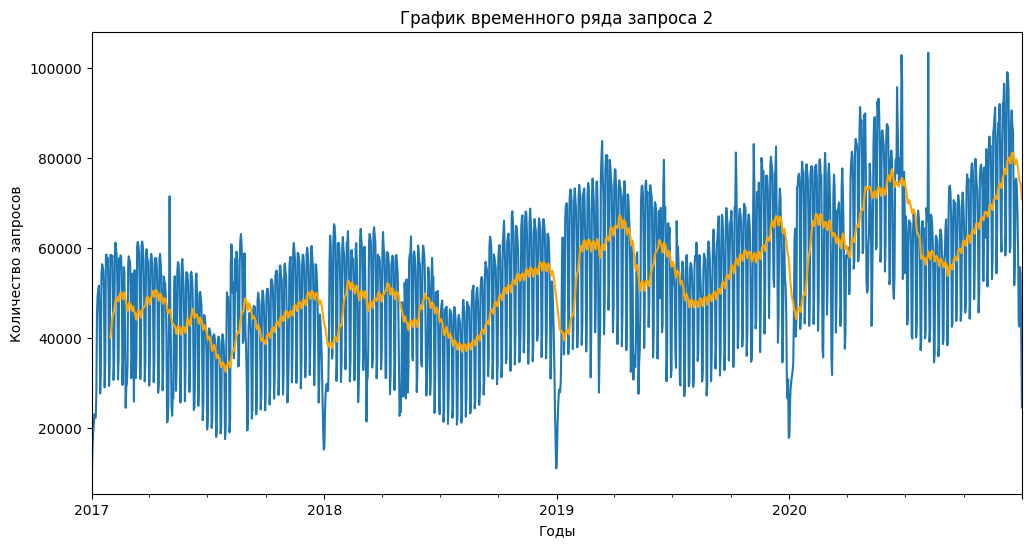

In [ ]:
train_sum_df2 = pd.DataFrame({'ds':train_df.loc[:, 'ds'], 'y':train_df.loc[:, '2']})
train_sum_df2.set_index('ds', inplace = True)
train_sum_df2.index = pd.to_datetime(train_sum_df2.index)

plt2 = train_sum_df2.plot(figsize = (12,6), legend = None)
plt2.plot(train_sum_df2.rolling(window = 30).mean(), label = 'Скользящее среднее по месяцам', color = 'orange')
plt2.set(title = 'График временного ряда запроса 2', xlabel = 'Годы', ylabel = 'Количество запросов')


[Text(0.5, 1.0, 'График временного ряда запроса 3'),
 Text(0.5, 0, 'Годы'),
 Text(0, 0.5, 'Количество запросов')]

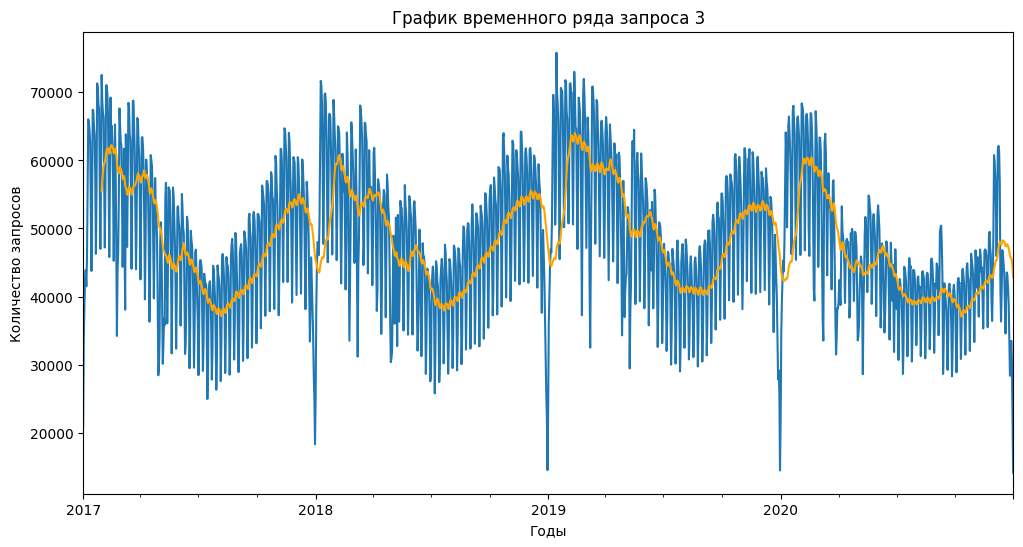

In [ ]:
train_sum_df3 = pd.DataFrame({'ds':train_df.loc[:, 'ds'], 'y':train_df.loc[:, '3']})
train_sum_df3.set_index('ds', inplace = True)
train_sum_df3.index = pd.to_datetime(train_sum_df3.index)

plt3 = train_sum_df3.plot(figsize = (12,6), legend = None)
plt3.plot(train_sum_df3.rolling(window = 30).mean(), label = 'Скользящее среднее по месяцам', color = 'orange')
plt3.set(title = 'График временного ряда запроса 3', xlabel = 'Годы', ylabel = 'Количество запросов')


[Text(0.5, 1.0, 'График временного ряда запроса 4'),
 Text(0.5, 0, 'Годы'),
 Text(0, 0.5, 'Количество запросов')]

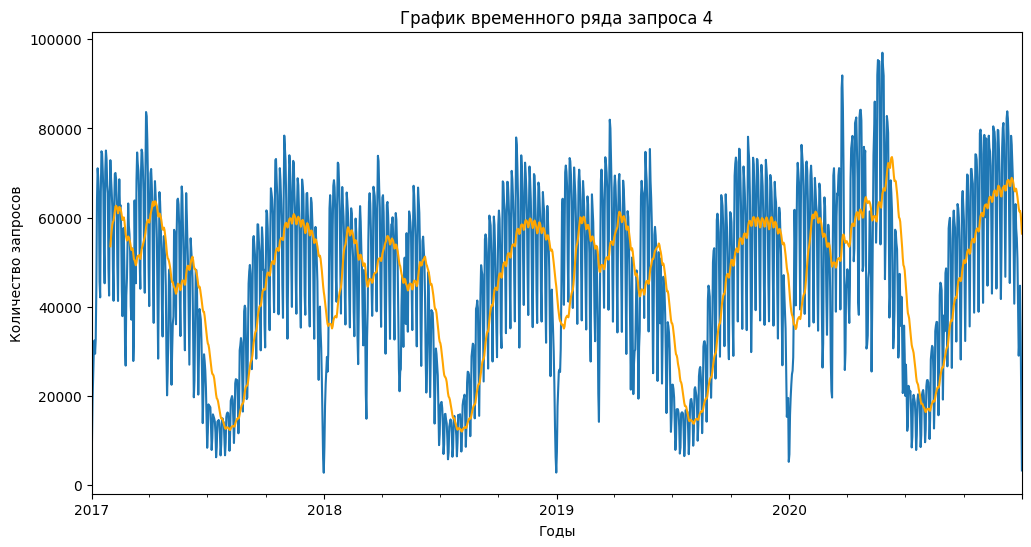

In [ ]:
train_sum_df4 = pd.DataFrame({'ds':train_df.loc[:, 'ds'], 'y':train_df.loc[:, '4']})
train_sum_df4.set_index('ds', inplace = True)
train_sum_df4.index = pd.to_datetime(train_sum_df4.index)

plt4 = train_sum_df4.plot(figsize = (12,6), legend = None)
plt4.plot(train_sum_df4.rolling(window = 30).mean(), label = 'Скользящее среднее по месяцам', color = 'orange')
plt4.set(title = 'График временного ряда запроса 4', xlabel = 'Годы', ylabel = 'Количество запросов')


[Text(0.5, 1.0, 'График временного ряда запроса 5'),
 Text(0.5, 0, 'Годы'),
 Text(0, 0.5, 'Количество запросов')]

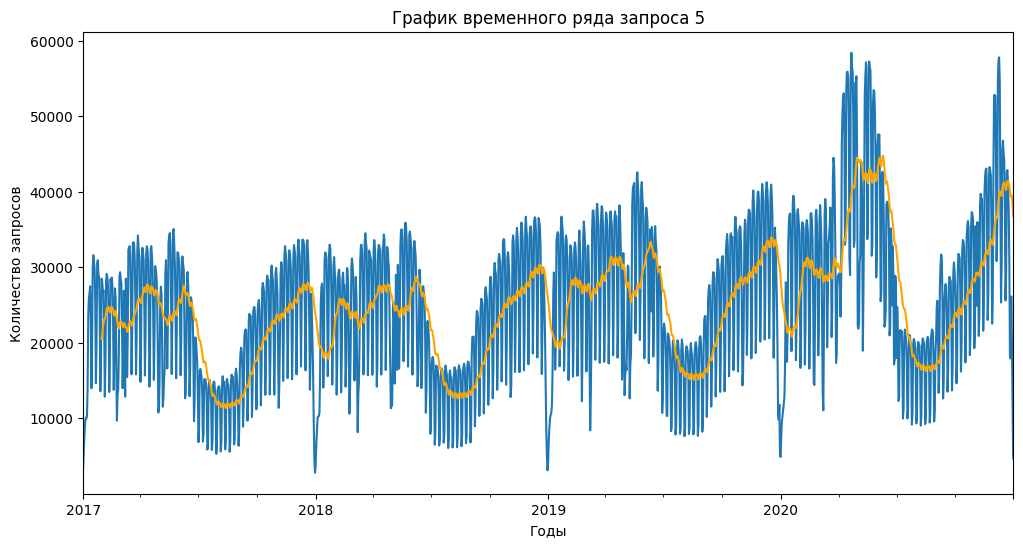

In [ ]:
train_sum_df5 = pd.DataFrame({'ds':train_df.loc[:, 'ds'], 'y':train_df.loc[:, '5']})
train_sum_df5.set_index('ds', inplace = True)
train_sum_df5.index = pd.to_datetime(train_sum_df5.index)

plt5 = train_sum_df5.plot(figsize = (12,6), legend = None)
plt5.plot(train_sum_df5.rolling(window = 30).mean(), label = 'Скользящее среднее по месяцам', color = 'orange')
plt5.set(title = 'График временного ряда запроса 5', xlabel = 'Годы', ylabel = 'Количество запросов')


[Text(0.5, 1.0, 'График временного ряда запроса 6'),
 Text(0.5, 0, 'Годы'),
 Text(0, 0.5, 'Количество запросов')]

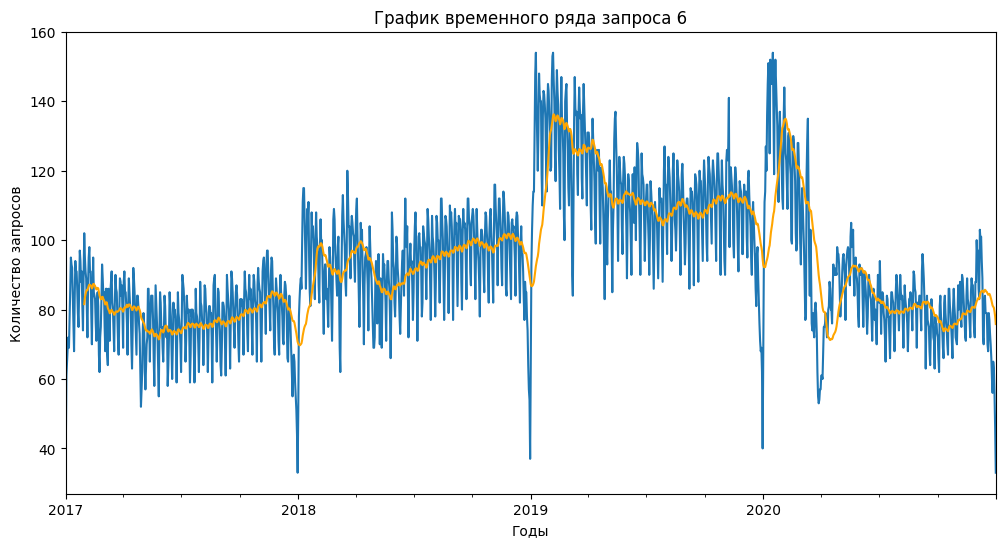

In [ ]:
train_sum_df6 = pd.DataFrame({'ds':train_df.loc[:, 'ds'], 'y':train_df.loc[:, '6']})
train_sum_df6.set_index('ds', inplace = True)
train_sum_df6.index = pd.to_datetime(train_sum_df6.index)

plt6 = train_sum_df6.plot(figsize = (12,6), legend = None)
plt6.plot(train_sum_df6.rolling(window = 30).mean(), label = 'Скользящее среднее по месяцам', color = 'orange')
plt6.set(title = 'График временного ряда запроса 6', xlabel = 'Годы', ylabel = 'Количество запросов')


[Text(0.5, 1.0, 'График временного ряда запроса 7'),
 Text(0.5, 0, 'Годы'),
 Text(0, 0.5, 'Количество запросов')]

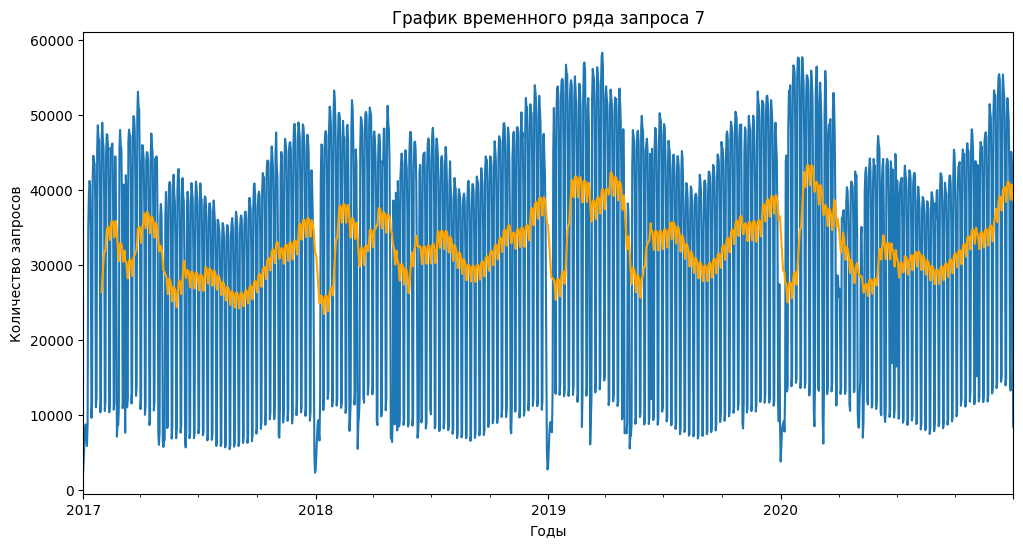

In [ ]:
train_sum_df7 = pd.DataFrame({'ds':train_df.loc[:, 'ds'], 'y':train_df.loc[:, '7']})
train_sum_df7.set_index('ds', inplace = True)
train_sum_df7.index = pd.to_datetime(train_sum_df7.index)

plt7 = train_sum_df7.plot(figsize = (12,6), legend = None)
plt7.plot(train_sum_df7.rolling(window = 30).mean(), label = 'Скользящее среднее по месяцам', color = 'orange')
plt7.set(title = 'График временного ряда запроса 7', xlabel = 'Годы', ylabel = 'Количество запросов')


[Text(0.5, 1.0, 'График временного ряда запроса 8'),
 Text(0.5, 0, 'Годы'),
 Text(0, 0.5, 'Количество запросов')]

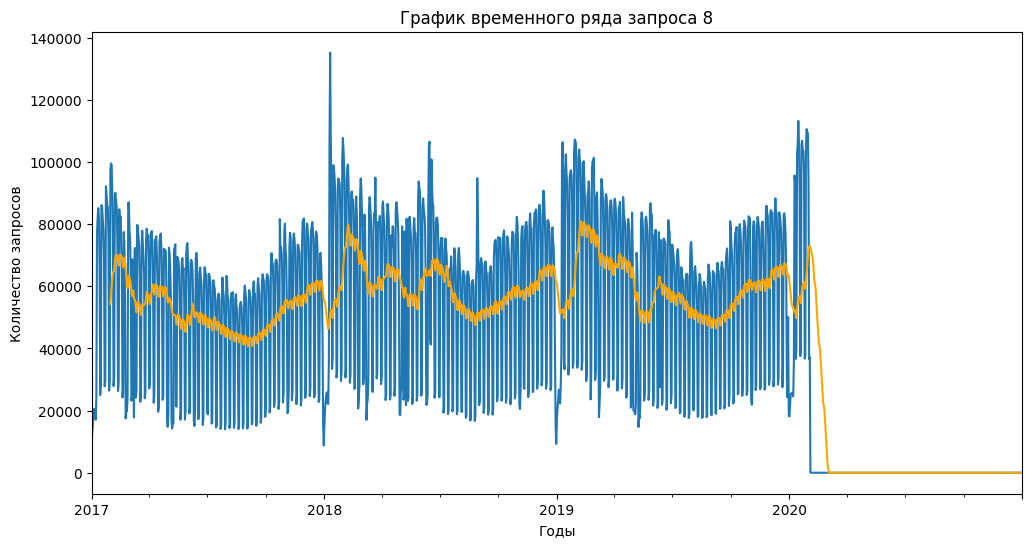

In [ ]:
train_sum_df8 = pd.DataFrame({'ds':train_df.loc[:, 'ds'], 'y':train_df.loc[:, '8']})
train_sum_df8.set_index('ds', inplace = True)
train_sum_df8.index = pd.to_datetime(train_sum_df8.index)

plt8 = train_sum_df8.plot(figsize = (12,6), legend = None)
plt8.plot(train_sum_df8.rolling(window = 30).mean(), label = 'Скользящее среднее по месяцам', color = 'orange')
plt8.set(title = 'График временного ряда запроса 8', xlabel = 'Годы', ylabel = 'Количество запросов')


**Вывод:**
во-первых, хочется выделить в отдельную категорию запрос 8 из-за то ли отсутствия значения, то ли аномальных значений в 2020 году, что не похоже ни на один из графиков запросов 1-7.
во-вторых, отдельно хочется не трогать запрос 6, так как его временной ряд довольно сильно отличается от всех остальных.
в-третьих, графики временных рядов запросов 1-5 и 7 выглядят достаточно похоже друг на друга (особенно если смотреть на их скользящие средние). Однако 3 запрос, единственный из перечисленных, имеет нисходящий тренд, поэтому я решила всё-таки выделить его в отдельную категорию.
ну, и в-четвёртых, запросы 1, 2, 4, 5 и 7 кажутся очень сильно схожими, ещё и все имеют восходящий тренд, поэтому выделим их сумму в последнюю категорию.

**Итог:**
- категория 1: сумма запросов 1 + 2 + 4 + 5 + 7
- категория 2: запрос 3
- категория 3: запрос 6
- категория 4: запрос 8

In [ ]:
# сгруппируйте категории запросов, если нужно. Почему именно так?

# категория 1
train_category1_df = pd.DataFrame({'ds':train_df.loc[:, 'ds'], 'y':train_df.loc[:, '1':'2'].sum(axis = 1)})
train_category1_df['y'] += train_df['4'] + train_df['5'] + train_df['7']
train_category1_df.set_index('ds', inplace = True)
train_category1_df.index = pd.to_datetime(train_category1_df.index)
train_category1_df['ds'] = train_category1_df.index

test_category1_df = pd.DataFrame({'ds':test_df.loc[:, 'ds'], 'y':test_df.loc[:, '1':'2'].sum(axis = 1)})
test_category1_df['y'] += test_df['4'] + test_df['5'] + test_df['7']

# категория 2
train_category2_df = pd.DataFrame({'ds':train_df.loc[:, 'ds'], 'y':train_df.loc[:, '3']})
train_category2_df.set_index('ds', inplace = True)
train_category2_df.index = pd.to_datetime(train_category2_df.index)
train_category2_df['ds'] = train_category2_df.index

test_category2_df = pd.DataFrame({'ds':test_df.loc[:, 'ds'], 'y':test_df.loc[:, '3']})

# категория 3
train_category3_df = pd.DataFrame({'ds':train_df.loc[:, 'ds'], 'y':train_df.loc[:, '6']})
train_category3_df.set_index('ds', inplace = True)
train_category3_df.index = pd.to_datetime(train_category3_df.index)
train_category3_df['ds'] = train_category3_df.index

test_category3_df = pd.DataFrame({'ds':test_df.loc[:, 'ds'], 'y':test_df.loc[:, '6']})

# категория 4
train_category4_df = pd.DataFrame({'ds':train_df.loc[:, 'ds'], 'y':train_df.loc[:, '8']})
train_category4_df.set_index('ds', inplace = True)
train_category4_df.index = pd.to_datetime(train_category4_df.index)
train_category4_df['ds'] = train_category4_df.index

test_category4_df = pd.DataFrame({'ds':test_df.loc[:, 'ds'], 'y':test_df.loc[:, '8']})


In [ ]:
from prophet import Prophet

# прогноз для категории 1
model_category1 = Prophet()
model_category1.fit(train_category1_df)

forecast_category1_df = model_category1.predict(test_category1_df)

# прогноз для категории 2
model_category2 = Prophet()
model_category2.fit(train_category2_df)

forecast_category2_df = model_category2.predict(test_category2_df)

# прогноз для категории 3
model_category3 = Prophet()
model_category3.fit(train_category3_df)

forecast_category3_df = model_category3.predict(test_category3_df)

# прогноз для категории 4
model_category4 = Prophet()
model_category4.fit(train_category4_df)

forecast_category4_df = model_category4.predict(test_category4_df)


# постройте прогноз по категориям
forecast_df_2 = forecast_category1_df['yhat'] + forecast_category2_df['yhat']
forecast_df_2 += forecast_category3_df['yhat'] + forecast_category4_df['yhat']


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l6ud4lk/e1sstq66.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l6ud4lk/b2u6hrgb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35744', 'data', 'file=/tmp/tmp_l6ud4lk/e1sstq66.json', 'init=/tmp/tmp_l6ud4lk/b2u6hrgb.json', 'output', 'file=/tmp/tmp_l6ud4lk/prophet_modelyqtqjxyg/prophet_model-20230617202102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:21:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:21:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l

In [ ]:
# посчитайте ошибку по данным из test_sum_df

mape2 = mape(test_sum_df['y'], forecast_df_2)
mape2

13.421460161520972

## 2.3. Улучшение модели (1 балл)

7. Для каждой группы из предыдущего задания постройте графики с фактом (train + test) и прогнозом, визуально оцените качество прогноза
8. Найдите недостатки, очистите временные ряды от аномалий или обновите параметры модели. Учтите праздники, если позволяет модель. Увеличить точность может использование не-статистического метода для какого-либо из рядов
9. Сделайте прогноз и замерьте качество на суммарных поисках, назовите ошибку `mape3`

Задание считается выполненным, если вы получили `mape3 < mape2` и `mape3 < mape1`, а прогноз №3 на весь 2021 год выглядит визуально адекватным

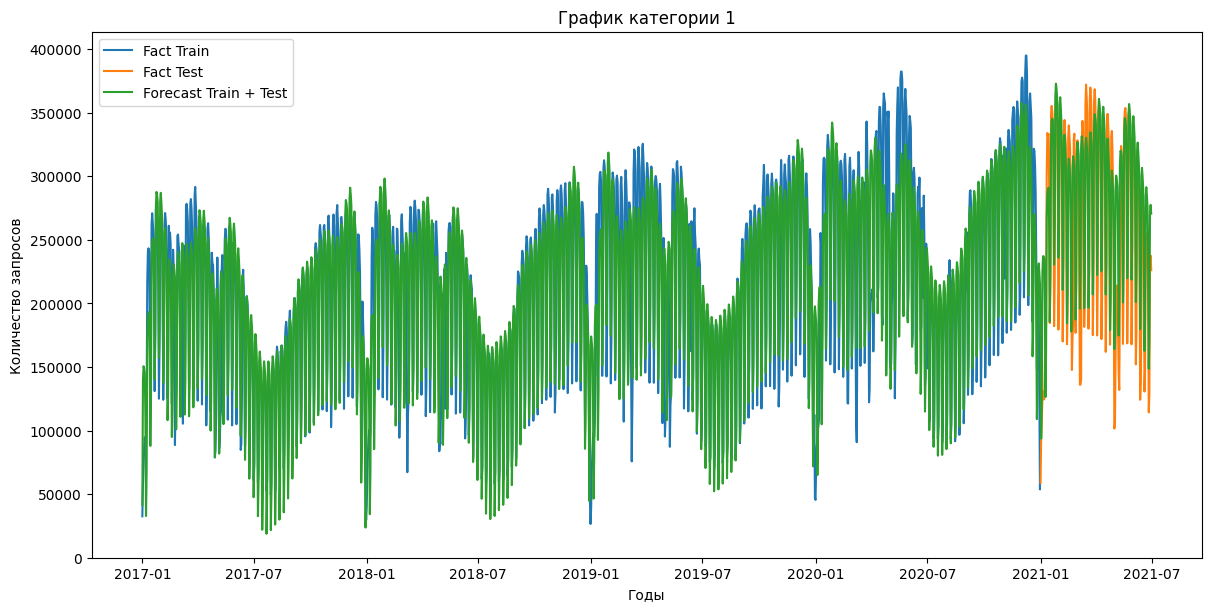

In [ ]:
# чтобы сравнить каждую группу с тестовой выборкой, нужно так же сгруппировать данные в ней

# факт для графиков
train_and_test_category1_df = pd.concat([test_category1_df, train_category1_df])

forecast_category1_df = model_category1.predict(train_and_test_category1_df)

import matplotlib.pyplot as plt

plt.figure(figsize = (12,6), layout='constrained')
plt.plot(train_category1_df['ds'], train_category1_df['y'], label='Fact Train')
plt.plot(test_category1_df['ds'], test_category1_df['y'], label='Fact Test')
plt.plot(forecast_category1_df['ds'], forecast_category1_df['yhat'], label='Forecast Train + Test')
plt.title('График категории 1')
plt.xlabel('Годы')
plt.ylabel('Количество запросов')
plt.legend()


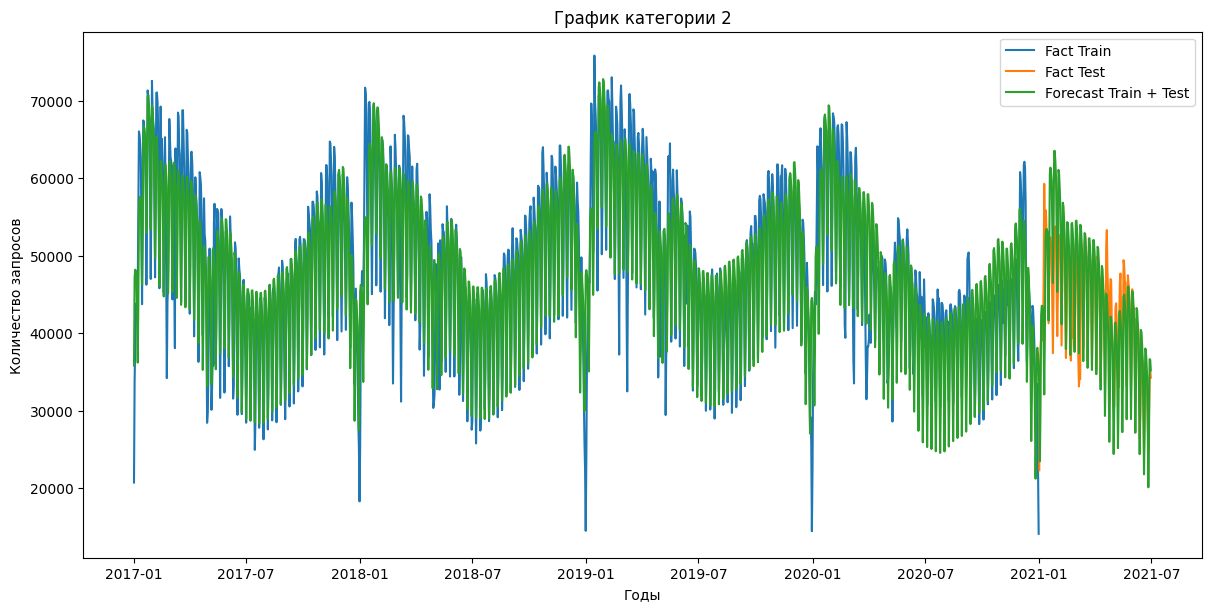

In [ ]:
train_and_test_category2_df = pd.concat([test_category2_df, train_category2_df])

forecast_category2_df = model_category2.predict(train_and_test_category2_df)

import matplotlib.pyplot as plt

plt.figure(figsize = (12,6), layout='constrained')
plt.plot(train_category2_df['ds'], train_category2_df['y'], label='Fact Train')
plt.plot(test_category2_df['ds'], test_category2_df['y'], label='Fact Test')
plt.plot(forecast_category2_df['ds'], forecast_category2_df['yhat'], label='Forecast Train + Test')
plt.title('График категории 2')
plt.xlabel('Годы')
plt.ylabel('Количество запросов')
plt.legend()


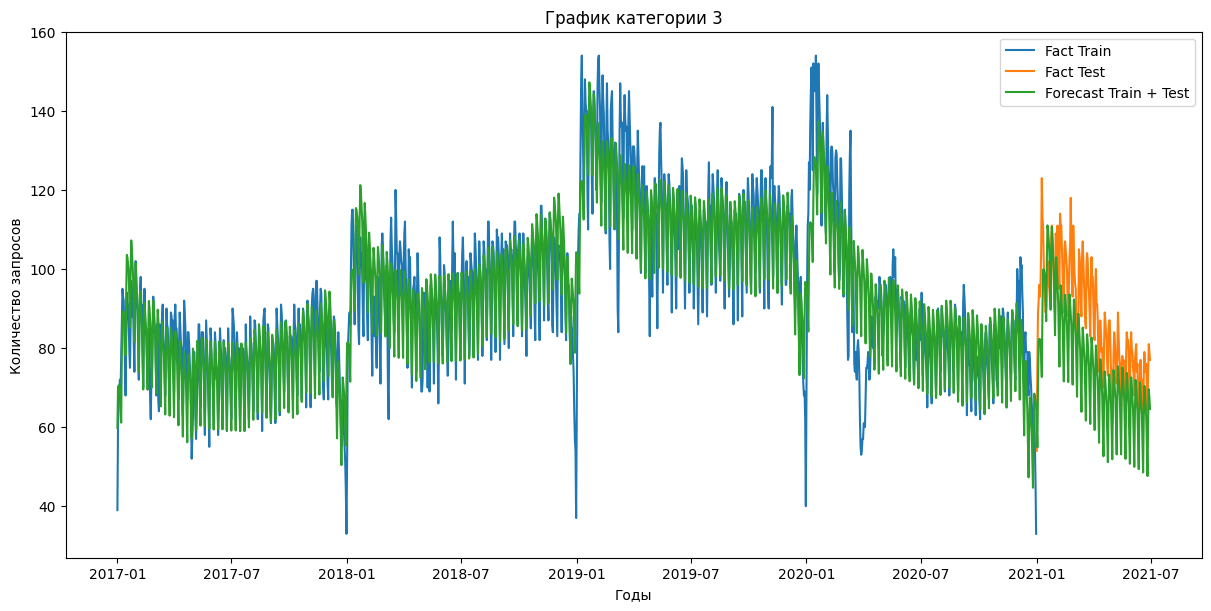

In [ ]:
train_and_test_category3_df = pd.concat([test_category3_df, train_category3_df])

forecast_category3_df = model_category3.predict(train_and_test_category3_df)

import matplotlib.pyplot as plt

plt.figure(figsize = (12,6), layout='constrained')
plt.plot(train_category3_df['ds'], train_category3_df['y'], label='Fact Train')
plt.plot(test_category3_df['ds'], test_category3_df['y'], label='Fact Test')
plt.plot(forecast_category3_df['ds'], forecast_category3_df['yhat'], label='Forecast Train + Test')
plt.title('График категории 3')
plt.xlabel('Годы')
plt.ylabel('Количество запросов')
plt.legend()


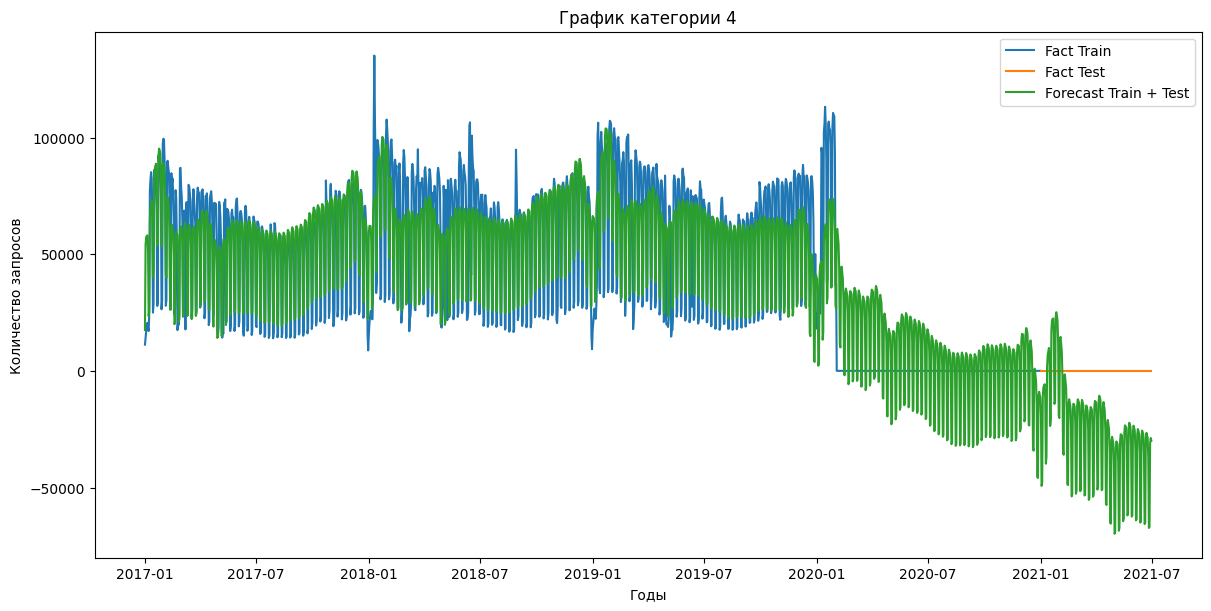

In [ ]:
train_and_test_category4_df = pd.concat([test_category4_df, train_category4_df])

forecast_category4_df = model_category4.predict(train_and_test_category4_df)

import matplotlib.pyplot as plt

plt.figure(figsize = (12,6), layout='constrained')
plt.plot(train_category4_df['ds'], train_category4_df['y'], label='Fact Train')
plt.plot(test_category4_df['ds'], test_category4_df['y'], label='Fact Test')
plt.plot(forecast_category4_df['ds'], forecast_category4_df['yhat'], label='Forecast Train + Test')
plt.title('График категории 4')
plt.xlabel('Годы')
plt.ylabel('Количество запросов')
plt.legend()


В целом, визуально модель как будто бы достаточно хорошо прогнозирует значения, только вот для тестовой выборки категории 3 прогноз плохо попадает в цифры, хоть и улавливает соответствующую тенденцию. И ещё из такого себе: модель совсем не реагирует на нулевые значения в категории 4, возможно с этим необходимо отдельно поработать.

In [ ]:
from prophet import Prophet

# прогноз для категории 1
model_category1_better = Prophet(seasonality_mode='multiplicative', holidays_prior_scale=0.02, yearly_seasonality=15)
model_category1_better.add_country_holidays(country_name='RU')
model_category1_better.fit(train_category1_df)

forecast_category1_better_df = model_category1_better.predict(test_category1_df)

# прогноз для категории 2
model_category2_better = Prophet(seasonality_mode='multiplicative', holidays_prior_scale=0.02, yearly_seasonality=15)
model_category2_better.add_country_holidays(country_name='RU')
model_category2_better.fit(train_category2_df)

forecast_category2_better_df = model_category2_better.predict(test_category2_df)

# прогноз для категории 3
model_category3_better = Prophet(seasonality_mode='multiplicative', holidays_prior_scale=0.02, yearly_seasonality=15)
model_category3_better.add_country_holidays(country_name='RU')
model_category3_better.fit(train_category3_df)

forecast_category3_better_df = model_category3_better.predict(test_category3_df)

# прогноз для категории 4
model_category4_better = Prophet(seasonality_mode='multiplicative', holidays_prior_scale=0.02, yearly_seasonality=15)
model_category4_better.add_country_holidays(country_name='RU')
model_category4_better.fit(train_category4_df)

forecast_category4_better_df = model_category4_better.predict(test_category4_df)

# постройте прогноз по очищенным категориям запросов

forecast_df_3 = forecast_category1_better_df['yhat'] + forecast_category2_better_df['yhat']
forecast_df_3 += forecast_category3_better_df['yhat'] + forecast_category4_better_df['yhat']


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l6ud4lk/rl1abwry.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l6ud4lk/kutn6a72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7342', 'data', 'file=/tmp/tmp_l6ud4lk/rl1abwry.json', 'init=/tmp/tmp_l6ud4lk/kutn6a72.json', 'output', 'file=/tmp/tmp_l6ud4lk/prophet_modeljczpcz1m/prophet_model-20230617201609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:16:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:16:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l6

In [ ]:
# посчитайте ошибку по данным из test_sum_df

mape3 = mape(test_sum_df['y'], forecast_df_3)
mape3

10.761335892097774

*вауу, гораздо лучше!*

## 2.4 Валидация модели (1 балл)

Вы обучали модель на обучающей выборке (train) и корректировали модель, основываясь на ошибке на тестовой выборке (test). Если при этом не оценивать прогноз визуально, модель может "[переобучиться](https://neerc.ifmo.ru/wiki/index.php?title=Переобучение)". В этом случае она будет хорошо предсказывать первое полугодие 2021, а другие периоды - плохо.

Давайте проверим, смогла ли модель понять общие зависимости в данных или переобучилась. Для этого нужно посчитать ошибку на `val.csv` (2021-06-01 - 2021-12-31) для всех моделей.

Задание считается выполненным, если корректно посчитана ошибка на валидационной выборке и построен итоговый график с фактом и прогнозами.

In [ ]:
val_df = pd.read_csv('val.csv', parse_dates=['ds'])
val_df.head()

,ds,1,2,3,4,5,6,7,8
0,2021-07-01,62766,58049,31976,27163,18777,79,42951,0
1,2021-07-02,54381,53112,28523,21717,17004,69,35499,0
2,2021-07-03,34160,36569,24154,11258,9027,67,9524,0
3,2021-07-04,36378,38771,28183,13988,9564,79,10200,0
4,2021-07-05,58207,59820,33812,22573,17787,86,40220,0


In [ ]:
val_category1_df = pd.DataFrame({'ds':val_df.loc[:, 'ds'], 'y':val_df.loc[:, '1':'2'].sum(axis = 1)})
val_category1_df['y'] += val_df['4'] + val_df['5'] + val_df['7']

val_category2_df = pd.DataFrame({'ds':val_df.loc[:, 'ds'], 'y':val_df.loc[:, '3']})

val_category3_df = pd.DataFrame({'ds':val_df.loc[:, 'ds'], 'y':val_df.loc[:, '6']})

val_category4_df = pd.DataFrame({'ds':val_df.loc[:, 'ds'], 'y':val_df.loc[:, '8']})

# сумма всех рядов
val_sum_df = pd.DataFrame({'ds':val_df.loc[:, 'ds'], 'y':val_df.loc[:, '1':'8'].sum(axis = 1)})

In [ ]:
# посчитайте ошибку на второе полугодие 2021 года для всех прогнозов

forecast_df_1_val = model.predict(val_sum_df)

val_error_1 = mape(val_sum_df['y'], forecast_df_1_val['yhat'])  # изначальный прогноз суммы


forecast_category1_df_val = model_category1.predict(val_category1_df)
forecast_category2_df_val = model_category2.predict(val_category2_df)
forecast_category3_df_val = model_category3.predict(val_category3_df)
forecast_category4_df_val = model_category4.predict(val_category4_df)

forecast_df_2_val = forecast_category1_df_val['yhat'] + forecast_category2_df_val['yhat']
forecast_df_2_val += forecast_category3_df_val['yhat'] + forecast_category4_df_val['yhat']

val_error_2 = mape(val_sum_df['y'], forecast_df_2_val)  # прогноз, разбитый на подкатегории


forecast_category1_better_val = model_category1_better.predict(val_category1_df)
forecast_category2_better_val = model_category2_better.predict(val_category2_df)
forecast_category3_better_val = model_category3_better.predict(val_category3_df)
forecast_category4_better_val = model_category4_better.predict(val_category4_df)

forecast_df_3_val = forecast_category1_better_val['yhat'] + forecast_category2_better_val['yhat']
forecast_df_3_val += forecast_category3_better_val['yhat'] + forecast_category4_better_val['yhat']

val_error_3 = mape(val_sum_df['y'], forecast_df_3_val)  # прогноз, разбитый на подкатегории и учитывающий сезонность

print(val_error_1, val_error_2, val_error_3)

20.06231920549045 19.30850799286876 12.316804143328753


класс! я считаю, проделана хорошая работа)

Обычно ошибка на валидационной выборке больше, чем на тестовой, это нормально. Однако, если она **гораздо** (например, в разы) больше ошибки на тестовой выборке, модель переобучилась.

Если ошибка получилась большой, это не критично: у нас не было цели создать идеальный прогноз. Основными критериями при оценивании домашнего задания будут методологически верный подход к построению и визуальная адекватность полученного прогноза

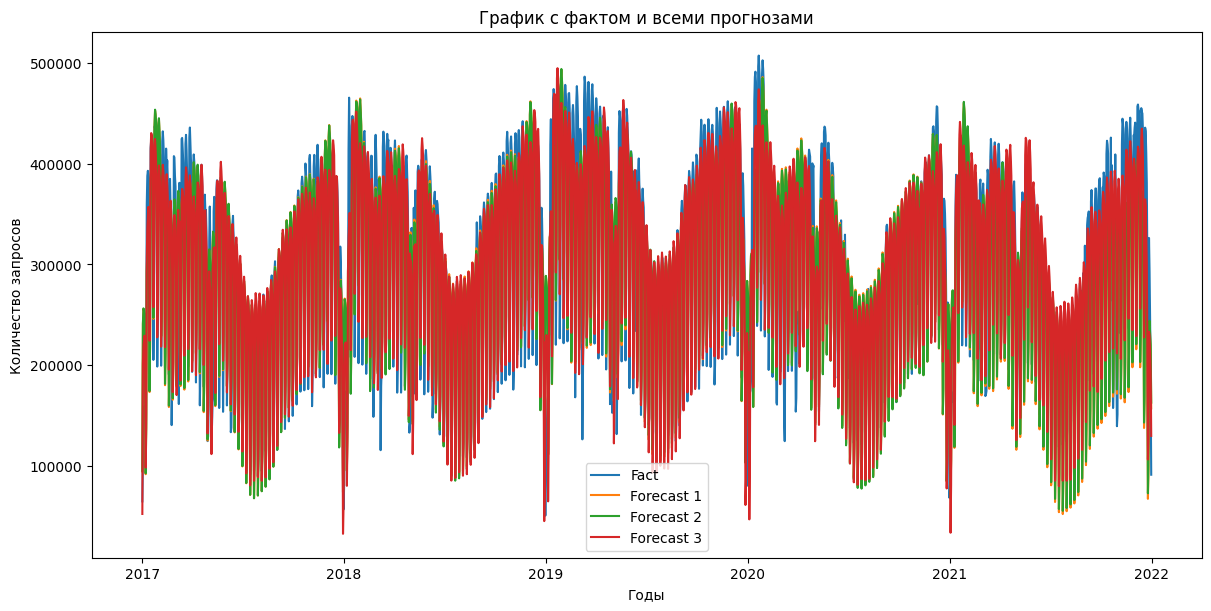

In [ ]:
# постройте при приложите график суммы поисков с фактом (train + test + val) и всеми прогнозами

train_test_val_df = pd.concat([train_sum_df, test_sum_df, val_sum_df], ignore_index=True)

ttv_category1_df = pd.concat([train_category1_df, test_category1_df, val_category1_df], ignore_index=True)
ttv_category2_df = pd.concat([train_category2_df, test_category2_df, val_category2_df], ignore_index=True)
ttv_category3_df = pd.concat([train_category3_df, test_category3_df, val_category3_df], ignore_index=True)
ttv_category4_df = pd.concat([train_category4_df, test_category4_df, val_category4_df], ignore_index=True)

forecast_1_df_ttv = model.predict(train_test_val_df)


forecast_category1_df_ttv = model_category1.predict(ttv_category1_df)
forecast_category2_df_ttv = model_category2.predict(ttv_category2_df)
forecast_category3_df_ttv = model_category3.predict(ttv_category3_df)
forecast_category4_df_ttv = model_category4.predict(ttv_category4_df)

forecast_2_df_ttv['yhat'] = forecast_category1_df_ttv['yhat'] + forecast_category2_df_ttv['yhat']
forecast_2_df_ttv['yhat'] += forecast_category3_df_ttv['yhat'] + forecast_category4_df_ttv['yhat']
forecast_2_df_ttv['ds'] = forecast_1_df_ttv['ds']


forecast_category1_better_ttv = model_category1_better.predict(ttv_category1_df)
forecast_category2_better_ttv = model_category2_better.predict(ttv_category2_df)
forecast_category3_better_ttv = model_category3_better.predict(ttv_category3_df)
forecast_category4_better_ttv = model_category4_better.predict(ttv_category4_df)

forecast_3_df_ttv['yhat'] = forecast_category1_better_ttv['yhat'] + forecast_category2_better_ttv['yhat']
forecast_3_df_ttv['yhat'] += forecast_category3_better_ttv['yhat'] + forecast_category4_better_ttv['yhat']
forecast_3_df_ttv['ds'] = forecast_1_df_ttv['ds']


import matplotlib.pyplot as plt

plt.figure(figsize = (12,6), layout='constrained')
plt.plot(train_test_val_df['ds'], train_test_val_df['y'], label='Fact')
plt.plot(forecast_1_df_ttv['ds'], forecast_1_df_ttv['yhat'], label='Forecast 1')
plt.plot(forecast_2_df_ttv['ds'], forecast_2_df_ttv['yhat'], label='Forecast 2')
plt.plot(forecast_3_df_ttv['ds'], forecast_3_df_ttv['yhat'], label='Forecast 3')
plt.title('График c фактом и всеми прогнозами')
plt.xlabel('Годы')
plt.ylabel('Количество запросов')
plt.legend()


In [ ]:
print('the end!')

# это была суперинтересная домашка, спасибо за неё! я прям кайфовала, пока делала)

the end!
